In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
import qiskit

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
def DeutschJoszaBal():
    
    #odd parity
    q=QuantumRegister(2)
    c=ClassicalRegister(2)
    qc=QuantumCircuit(q,c)
    
    qc.i(0)
    qc.x(1)
    qc.h(0)
    qc.h(1)
    
    qc.barrier()
    #Balanced Function f(0)=1, f(1)=0
    qc.x(0)
    qc.cx(0,1)
    qc.x(0)
    #balancer end
    qc.barrier()
    #measurement
    qc.h(0)
    qc.measure(0,0)
    return qc

In [4]:
qc=DeutschJoszaBal()

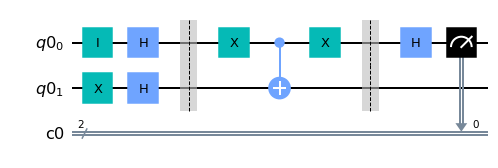

In [5]:
qc.draw()

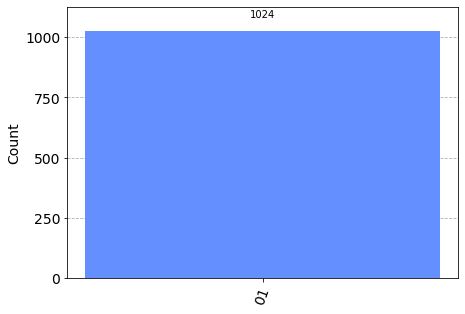

In [6]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = qiskit.assemble(qc, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)